In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

In [ ]:
file_path = '/content/spam.csv'
df = pd.read_csv(file_path, encoding='latin1')

In [ ]:
df = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])
df.columns = ['label', 'message']

In [ ]:
print(df.isnull().sum())

label      0
message    0
dtype: int64


<ipython-input-8-408fd4969010>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='viridis')


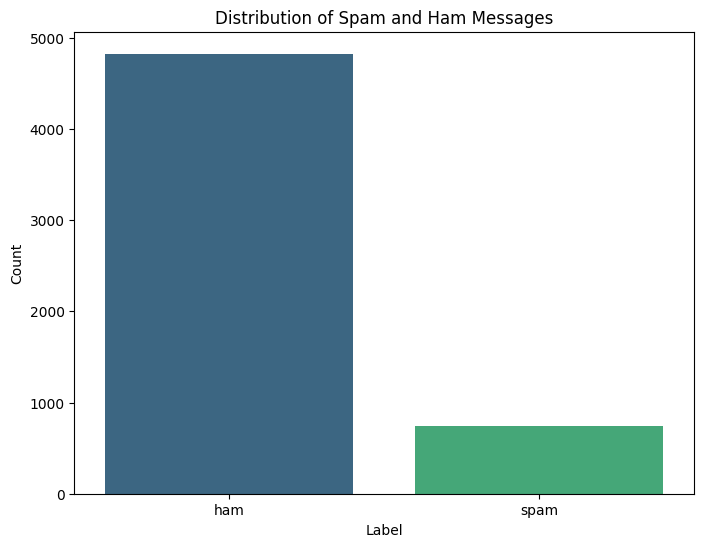

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df, palette='viridis')
plt.title('Distribution of Spam and Ham Messages')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [ ]:
df['message_length'] = df['message'].apply(len)

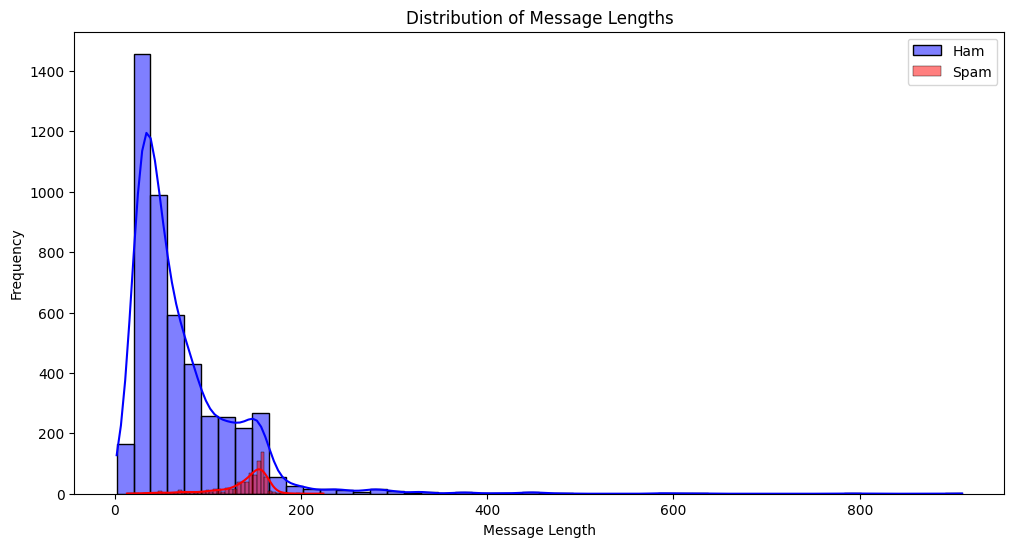

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['label'] == 'ham']['message_length'], bins=50, color='blue', label='Ham', kde=True)
sns.histplot(df[df['label'] == 'spam']['message_length'], bins=50, color='red', label='Spam', kde=True)
plt.title('Distribution of Message Lengths')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [ ]:
print(df.groupby('label')['message_length'].describe())

        count        mean        std   min    25%    50%    75%    max
label                                                                 
ham    4825.0   71.023627  58.016023   2.0   33.0   52.0   92.0  910.0
spam    747.0  138.866131  29.183082  13.0  132.5  149.0  157.0  224.0


In [ ]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train_tfidf, y_train)
lr_pred = lr_model.predict(X_test_tfidf)
lr_pred_prob = lr_model.predict_proba(X_test_tfidf)[:, 1]

In [ ]:
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
nb_pred = nb_model.predict(X_test_tfidf)
nb_pred_prob = nb_model.predict_proba(X_test_tfidf)[:, 1]

In [ ]:
svc_model = SVC(kernel='linear', probability=True)
svc_model.fit(X_train_tfidf, y_train)
svc_pred = svc_model.predict(X_test_tfidf)
svc_pred_prob = svc_model.predict_proba(X_test_tfidf)[:, 1]

In [ ]:
def evaluate_model(pred, pred_prob, y_test, model_name):
    print(f"Evaluation Metrics for {model_name}:")
    print("Accuracy:", accuracy_score(y_test, pred))
    print("Classification Report:\n", classification_report(y_test, pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, pred))
    fpr, tpr, _ = roc_curve(y_test, pred_prob)
    roc_auc = roc_auc_score(y_test, pred_prob)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    print("\n")

Evaluation Metrics for Logistic Regression:
Accuracy: 0.9524663677130045
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       965
           1       0.97      0.67      0.79       150

    accuracy                           0.95      1115
   macro avg       0.96      0.83      0.88      1115
weighted avg       0.95      0.95      0.95      1115

Confusion Matrix:
 [[962   3]
 [ 50 100]]




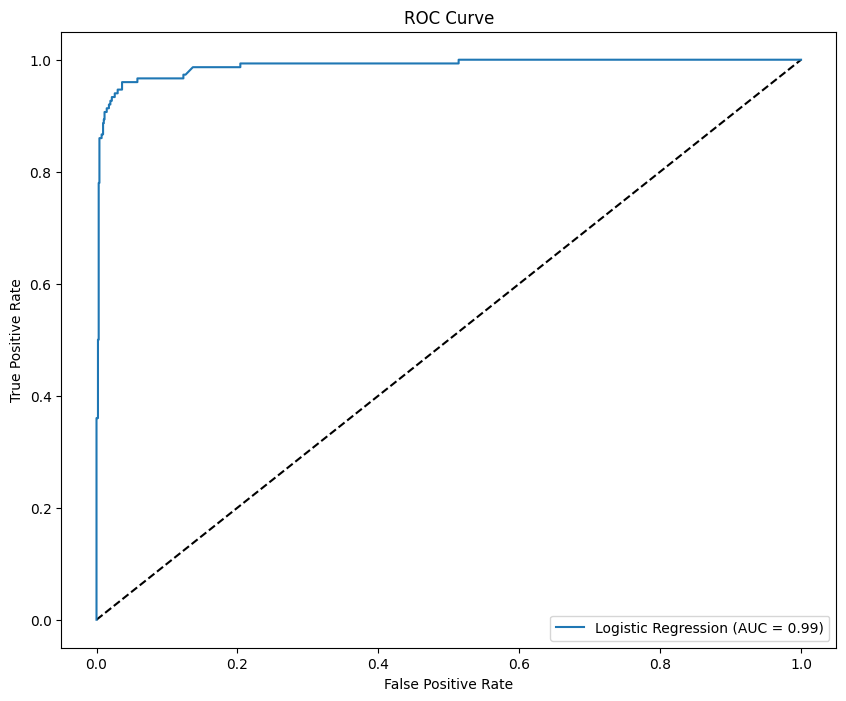

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], 'k--')
evaluate_model(lr_pred, lr_pred_prob, y_test, "Logistic Regression")
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

Evaluation Metrics for Naive Bayes:
Accuracy: 0.9668161434977578
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115

Confusion Matrix:
 [[965   0]
 [ 37 113]]




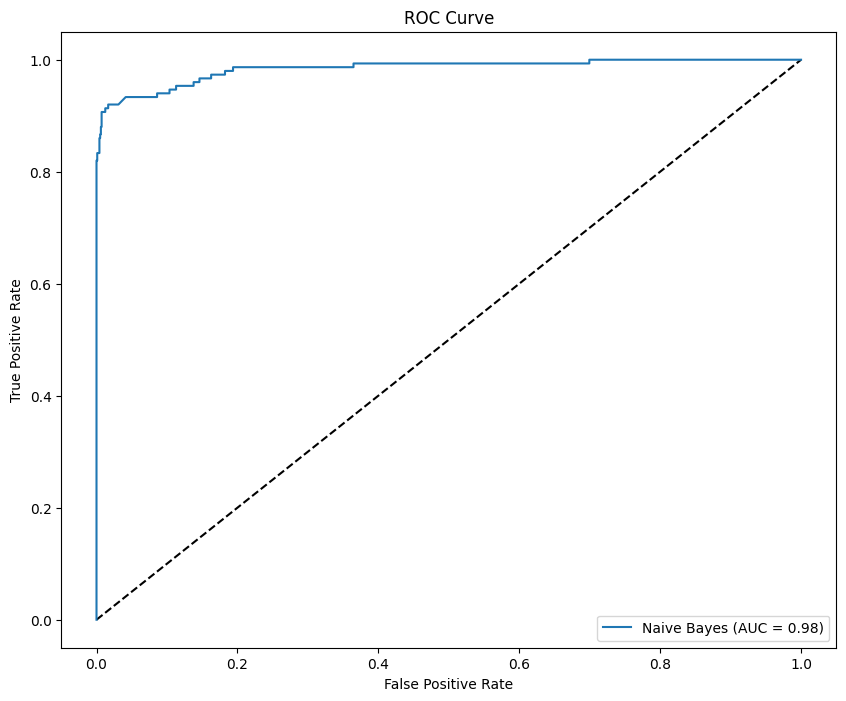

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], 'k--')
evaluate_model(nb_pred, nb_pred_prob, y_test, "Naive Bayes")
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

Evaluation Metrics for Support Vector Machine:
Accuracy: 0.979372197309417
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.97      0.87      0.92       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115

Confusion Matrix:
 [[961   4]
 [ 19 131]]




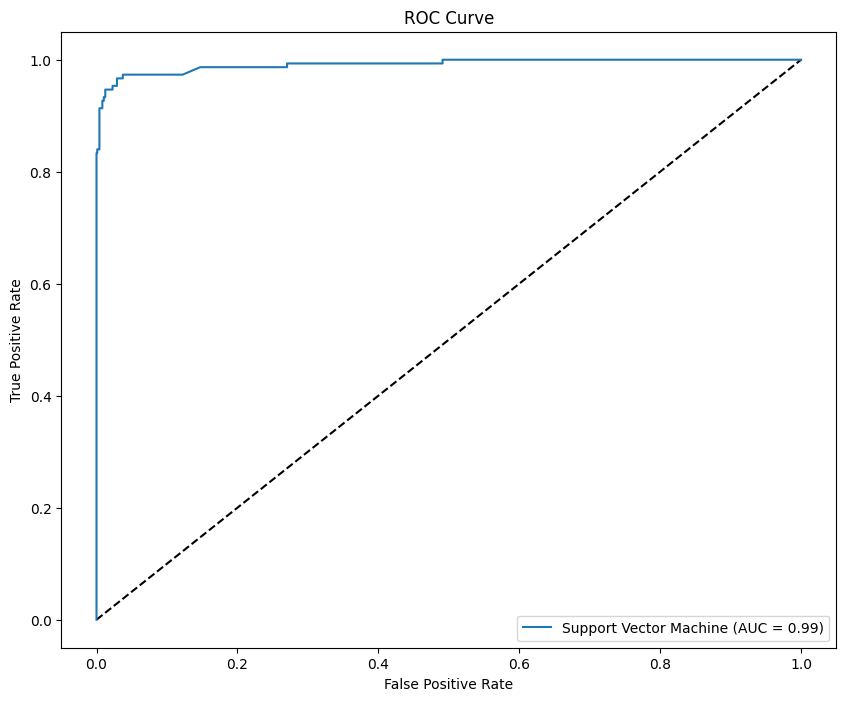

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], 'k--')
evaluate_model(svc_pred, svc_pred_prob, y_test, "Support Vector Machine")
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()